## IMPORTING LIBRARIES

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
import zipfile
# open zipped dataset
with zipfile.ZipFile(r"C:\Users\\HP\Downloads\\archive (2).zip") as z:
   # open the csv file in the dataset
   with z.open("train.csv") as f:
       
      # read the dataset
      train_data = pd.read_csv(f)
       
      # display dataset
      train_df = pd.DataFrame(train_data)

train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
train_df.shape

(103904, 25)

In [4]:
#checking for missing values
train_df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [5]:
#dropping the missing values
train_df.dropna(subset=['Arrival Delay in Minutes'], inplace=True)
train_df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Data Visualization and Preprocessing

In [6]:
#lets see how many of each classes is in the dataset
train_df['satisfaction'].value_counts()

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

58879 people were neutral or dissatisfied with the airline performance while 45025 people were satisfied with the airline
services

In [7]:
train_df['Gender'].value_counts()

Female    52576
Male      51018
Name: Gender, dtype: int64

52727 of the passengers are female and 51177 are male

In [8]:
train_df['Customer Type'].value_counts()

Loyal Customer       84662
disloyal Customer    18932
Name: Customer Type, dtype: int64

84923 of the passengers were tagged as loyal customers and 18981 as disloyal customer

In [9]:
#lets rename the customer type column to one word
train_df.rename(columns={'Customer Type':'Customer_Type'},inplace=True)

In [10]:
#replacing some of the columns values to numeric values
train_df['Customer_Type'].replace(to_replace=['Loyal Customer','disloyal Customer'], value=[0,1],inplace=True)
train_df['Type of Travel'].replace(to_replace=['Personal Travel','Business travel'], value=[0,1],inplace=True)
train_df['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)
train_df['Class'].replace(to_replace=['Business','Eco', 'Eco Plus'], value=[0,1,2],inplace=True)
train_df[['Customer_Type', 'Type of Travel', 'Gender', 'Class']].head()

,Customer_Type,Type of Travel,Gender,Class
0,0,0,0,2
1,1,1,0,0
2,0,1,1,0
3,0,1,1,0
4,0,1,0,0


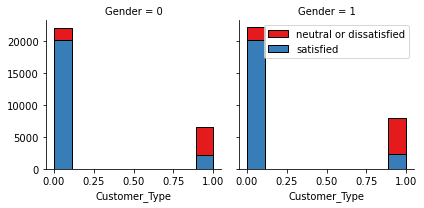

In [11]:
#lets plot the columns to understand the data better
import seaborn as sns

bins = np.linspace(train_df.Customer_Type.min(), train_df.Customer_Type.max(), 10)
g = sns.FacetGrid(train_df, col="Gender", hue="satisfaction", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Customer_Type', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

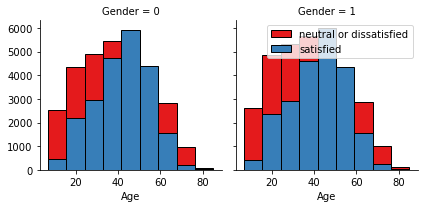

In [12]:
bins = np.linspace(train_df.Age.min(), train_df.Age.max(), 10)
g = sns.FacetGrid(train_df, col="Gender", hue="satisfaction", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

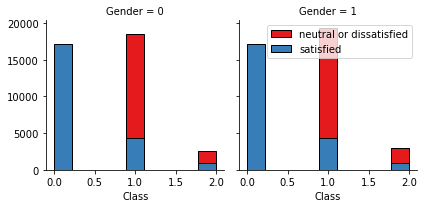

In [13]:
bins = np.linspace(train_df.Class.min(), train_df.Class.max(), 10)
g = sns.FacetGrid(train_df, col="Gender", hue="satisfaction", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Class', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [14]:
train_df.groupby(['Gender'])['satisfaction'].value_counts(normalize=True)

Gender  satisfaction           
0       neutral or dissatisfied    0.560390
        satisfied                  0.439610
1       neutral or dissatisfied    0.572638
        satisfied                  0.427362
Name: satisfaction, dtype: float64

1. 57 percent of female passengers were neutral or dissatisfied with the airline performance
2. 42 percent of female passengers were satisfied with the airline performance
3. 56 percent of male passengers were neutral or dissatisfied with the airline performance
4. 43 percent of male passengers were satisfied with the airline performance

In [15]:
train_df.groupby(['Class'])['satisfaction'].value_counts(normalize=True)

Class  satisfaction           
0      satisfied                  0.694285
       neutral or dissatisfied    0.305715
1      neutral or dissatisfied    0.813899
       satisfied                  0.186101
2      neutral or dissatisfied    0.754151
       satisfied                  0.245849
Name: satisfaction, dtype: float64

## Preprocessing

In [16]:
feature = train_df[['Gender', 'Customer_Type', 'Age', 'Type of Travel','Inflight service','Departure/Arrival time convenient','Inflight entertainment', 'Cleanliness']]
feature.head()

,Gender,Customer_Type,Age,Type of Travel,Inflight service,Departure/Arrival time convenient,Inflight entertainment,Cleanliness
0,0,0,13,0,5,4,5,5
1,0,1,25,1,4,2,1,1
2,1,0,26,1,4,2,5,5
3,1,0,25,1,4,5,2,2
4,0,0,61,1,3,3,3,3


## Feature Selection
Defining feature sets and labels

In [17]:
#defining feature sets
X = feature
X[0:5]

,Gender,Customer_Type,Age,Type of Travel,Inflight service,Departure/Arrival time convenient,Inflight entertainment,Cleanliness
0,0,0,13,0,5,4,5,5
1,0,1,25,1,4,2,1,1
2,1,0,26,1,4,2,5,5
3,1,0,25,1,4,5,2,2
4,0,0,61,1,3,3,3,3


In [18]:
#Defining our labels
y = train_df['satisfaction'].values
y[0:5]

array(['neutral or dissatisfied', 'neutral or dissatisfied', 'satisfied',
       'neutral or dissatisfied', 'satisfied'], dtype=object)

## Normalization of Data

In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.01515429, -0.47288331, -1.7455419 , -1.49141359,  1.15621132,
         0.61624939,  1.23152984,  1.30591327],
       [-1.01515429,  2.1146866 , -0.95152625,  0.67050482,  0.30557993,
        -0.6950321 , -1.76916641, -1.74243151],
       [ 0.98507193, -0.47288331, -0.88535828,  0.67050482,  0.30557993,
        -0.6950321 ,  1.23152984,  1.30591327],
       [ 0.98507193, -0.47288331, -0.95152625,  0.67050482,  0.30557993,
         1.27189014, -1.01899235, -0.98034531],
       [-1.01515429, -0.47288331,  1.43052068,  0.67050482, -0.54505146,
        -0.03939135, -0.26881829, -0.21825912]])

## Classification
couples of classification models will be used to train to model to know the best model to test the testing data with

### KNN Neighbors

In [20]:
#import the knn classifier
from sklearn.neighbors import KNeighborsClassifier

In [21]:
#spliting dataset into testing and training for the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [22]:
#calculate the accuracy of KNN for different values of k to find the best k
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.81953762, 0.84482842, 0.85549496, 0.86201071, 0.86485834,
       0.86741638, 0.86886433, 0.87036054, 0.87060186])

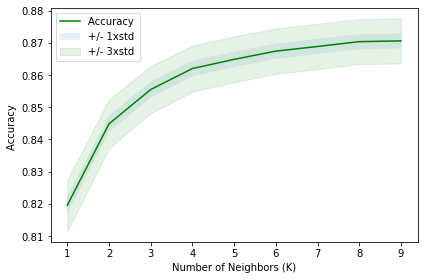

The best accuracy was with 0.8706018630242772 with k= 9


In [23]:
#Plot the model accuracy for a different number of neighbors.
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [24]:
#lets use k=9 for the model
k = 9
neigh9 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat9 = neigh9.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh9.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat9))

Train set Accuracy:  0.8872036199095023
Test set Accuracy:  0.8706018630242772


### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
SatisfiedTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
SatisfiedTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [26]:
#prediction of the testset
SatisfiedTree = SatisfiedTree.predict(X_test)

# evaluation of the testset
print("Satisfaction Tree's Accuracy: ", metrics.accuracy_score(y_test, SatisfiedTree))

Satisfaction Tree's Accuracy:  0.8581977894686037


[Text(167.4, 195.696, 'X[3] <= -0.41\nentropy = 0.988\nsamples = 82875\nvalue = [46876, 35999]'),
 Text(83.7, 152.208, 'X[2] <= 1.794\nentropy = 0.476\nsamples = 25627\nvalue = [23010, 2617]'),
 Text(41.85, 108.72, 'X[5] <= 0.288\nentropy = 0.479\nsamples = 24043\nvalue = [21559, 2484]'),
 Text(20.925, 65.232, 'X[4] <= 0.731\nentropy = 0.465\nsamples = 7831\nvalue = [7058, 773]'),
 Text(10.4625, 21.744, 'entropy = 0.475\nsamples = 7054\nvalue = [6336, 718]'),
 Text(31.387500000000003, 21.744, 'entropy = 0.369\nsamples = 777\nvalue = [722, 55]'),
 Text(62.775000000000006, 65.232, 'X[6] <= -1.394\nentropy = 0.486\nsamples = 16212\nvalue = [14501, 1711]'),
 Text(52.3125, 21.744, 'entropy = 0.517\nsamples = 2750\nvalue = [2432, 318]'),
 Text(73.2375, 21.744, 'entropy = 0.48\nsamples = 13462\nvalue = [12069, 1393]'),
 Text(125.55000000000001, 108.72, 'X[6] <= 0.856\nentropy = 0.416\nsamples = 1584\nvalue = [1451, 133]'),
 Text(104.625, 65.232, 'X[5] <= -1.023\nentropy = 0.4\nsamples = 1258\

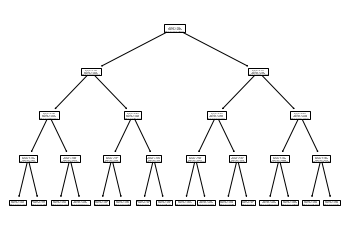

In [27]:
#visualisation of the tree
from sklearn import tree
SatisfiedTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
SatisfiedTree.fit(X_train,y_train)
tree.plot_tree(SatisfiedTree)

## Logistics Regression

In [28]:
from sklearn.linear_model import LogisticRegression
SatisfiedReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
SatisfiedReg

LogisticRegression(C=0.01, solver='liblinear')

In [36]:
yhat = SatisfiedReg.predict(X_test)
yhat

array(['neutral or dissatisfied', 'satisfied', 'neutral or dissatisfied',
       ..., 'satisfied', 'satisfied', 'neutral or dissatisfied'],
      dtype=object)

In [30]:
#predict probability
yhat_prob = SatisfiedReg.predict_proba(X_test)
yhat_prob

array([[0.8620258 , 0.1379742 ],
       [0.27086463, 0.72913537],
       [0.69191245, 0.30808755],
       ...,
       [0.12298887, 0.87701113],
       [0.18571205, 0.81428795],
       [0.96758247, 0.03241753]])

In [32]:
# evaluation of the model using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

                         precision    recall  f1-score   support

neutral or dissatisfied       0.84      0.85      0.85     11821
              satisfied       0.80      0.79      0.79      8898

               accuracy                           0.82     20719
              macro avg       0.82      0.82      0.82     20719
           weighted avg       0.82      0.82      0.82     20719

Confusion matrix, without normalization
[[10082  1739]
 [ 1910  6988]]


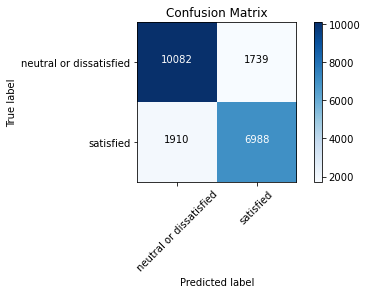

In [33]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['neutral or dissatisfied','satisfied'], normalize=False, title='Confusion Matrix')